In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
import seaborn as sns

In [2]:
df_book = pd.read_csv("Books.csv")
df_rating = pd.read_csv("Ratings.csv")
df_user = pd.read_csv("Users.csv")

df_book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [3]:
df_book.drop(["Image-URL-S","Image-URL-M","Image-URL-L"],axis=1,inplace=True)
df_book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [4]:
df_book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [5]:
pd.set_option("display.max_colwidth",-1)

In [6]:
df_book["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [7]:
df_book.loc[df_book["Year-Of-Publication"]=='DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [8]:
df_book.loc[df_book["ISBN"] == '0789466953','Year-Of-Publication'] = 2000
df_book.loc[df_book["ISBN"] == '0789466953','Book-Author'] = "James Buckley"
df_book.loc[df_book["ISBN"] == '0789466953','Publisher'] = "DK Publishing Inc"
df_book.loc[df_book["ISBN"] == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [9]:
df_book.loc[df_book["ISBN"] == '078946697X','Year-Of-Publication'] = 2000
df_book.loc[df_book["ISBN"] == '078946697X','Book-Author'] = "Michael Teitelbaum"
df_book.loc[df_book["ISBN"] == '078946697X','Publisher'] = "DK Publishing Inc"
df_book.loc[df_book["ISBN"] == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [10]:
df_book.loc[(df_book["ISBN"] == '0789466953') | (df_book["ISBN"] == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [11]:
df_book.loc[df_book["Year-Of-Publication"]=='Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [12]:
df_book.loc[df_book["ISBN"] == '2070426769','Year-Of-Publication'] = 2003
df_book.loc[df_book["ISBN"] == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_book.loc[df_book["ISBN"] == '2070426769','Publisher'] = "Gallimard"
df_book.loc[df_book["ISBN"] == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [13]:
df_book.loc[df_book["ISBN"]=='2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [14]:
df_book["Year-Of-Publication"]=pd.to_numeric(df_book["Year-Of-Publication"], errors='coerce')

In [15]:
print(sorted(df_book['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [16]:
df_book.loc[(df_book["Year-Of-Publication"] > 2006) | (df_book["Year-Of-Publication"]  == 0),'Year-Of-Publication'] = np.NAN

In [17]:
df_book["Year-Of-Publication"].fillna(round(df_book["Year-Of-Publication"].mean()), inplace=True)

In [18]:
df_book["Year-Of-Publication"].isnull().sum()

0

In [19]:
df_book["Year-Of-Publication"] = df_book["Year-Of-Publication"].astype(np.int32)

In [20]:
pd.set_option('display.max_colwidth', -1)

Publisher

In [21]:
df_book["Publisher"].isnull().sum()

2

In [22]:
df_book.loc[df_book["Publisher"].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [23]:
df_book.loc[(df_book["ISBN"] == "193169656X"),"Publisher"] = "other"
df_book.loc[(df_book["ISBN"] == "1931696993"),"Publisher"] = "other"

In [24]:
df_user.shape

(278858, 3)

In [25]:
df_user.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [26]:
sorted(df_user["Age"].unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


In [27]:
df_user.loc[(df_user["Age"] > 90) | (df_user["Age"]<5),"Age"] = np.nan

In [28]:
df_user["Age"] = df_user["Age"].fillna(df_user["Age"].mean())

In [29]:
df_user["Age"] = df_user["Age"].astype(np.int32)

In [49]:
#sorted(df_user["Age"].unique())

Rating Dataset

In [31]:
df_rating.shape

(1149780, 3)

In [32]:
n_users = df_user.shape[0]
n_books = df_book.shape[0]
print(n_users*n_books)

75670906880


In [33]:
df_rating["Book-Rating"].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [34]:
ratings_new = df_rating[df_rating["ISBN"].isin(df_book["ISBN"])]

In [35]:
print(df_rating.shape)
print(ratings_new.shape)

(1149780, 3)
(1031136, 3)


In [36]:
rating_new = df_rating[df_rating["User-ID"].isin(df_user["User-ID"])]

In [50]:
print(df_rating.shape)
print(rating_new.shape)

(1149780, 3)
(271360, 5)


In [38]:
rating0 = ratings_new[ratings_new["Book-Rating"] == 0]
print(ratings_new.shape)
print(rating0.shape)

(1031136, 3)
(647294, 3)


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

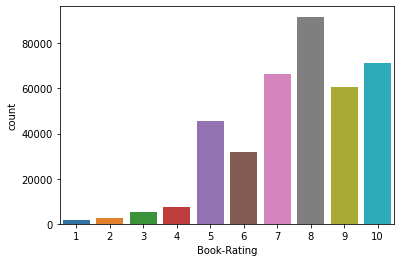

In [39]:
ratings = ratings_new[ratings_new["Book-Rating"] != 0]
sns.countplot(data = ratings, x ="Book-Rating")

In [40]:
df1 = pd.merge(df_user, df_rating,on="User-ID",how= "inner")
print(df_user.shape)
print(df_rating.shape)
print(df1.shape)

(278858, 3)
(1149780, 3)
(1149780, 5)


In [41]:
df = pd.merge(df1,df_book,on="ISBN")

In [42]:
df.shape

(1031136, 9)

In [43]:
df.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",34,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [44]:
df["Book-Title"].isnull().sum()

0

In [64]:
book0 = pd.read_csv("book1-100k.csv")
book1 = pd.read_csv("book100k-200k.csv")
book2 = pd.read_csv("book200k-300k.csv")
book3 = pd.read_csv("book300k-400k.csv")
book4 = pd.read_csv("book400k-500k.csv")
book5 = pd.read_csv("book500k-600k.csv")
book6 = pd.read_csv("book600k-700k.csv")
book7 = pd.read_csv("book700k-800k.csv")
book8 = pd.read_csv("book800k-900k.csv")
book9 = pd.read_csv("book900k-1000k.csv")
book10 = pd.read_csv("book1000k-1100k.csv")
book11 = pd.read_csv("book1100k-1200k.csv")
book12 = pd.read_csv("book1200k-1300k.csv")
book13 = pd.read_csv("book1300k-1400k.csv")
book14 = pd.read_csv("book1400k-1500k.csv")
book15 = pd.read_csv("book1500k-1600k.csv")
book16 = pd.read_csv("book1600k-1700k.csv")
book17 = pd.read_csv("book1700k-1800k.csv")
book18 = pd.read_csv("book1800k-1900k.csv")
book19 = pd.read_csv("book1900k-2000k.csv")
book20 = pd.read_csv("book2000k-3000k.csv")

In [65]:
dfb0 = pd.merge(df,book0,on="ISBN")
dfb1 = pd.merge(df,book1,on="ISBN")
dfb2 = pd.merge(df,book2,on="ISBN")
dfb3 = pd.merge(df,book3,on="ISBN")
dfb4 = pd.merge(df,book4,on="ISBN")
dfb5 = pd.merge(df,book5,on="ISBN")
dfb6 = pd.merge(df,book6,on="ISBN")
dfb7 = pd.merge(df,book7,on="ISBN")
dfb8 = pd.merge(df,book8,on="ISBN")
dfb9 = pd.merge(df,book9,on="ISBN")
dfb10 = pd.merge(df,book10,on="ISBN")
dfb11 = pd.merge(df,book11,on="ISBN")
dfb12 = pd.merge(df,book12,on="ISBN")
dfb13 = pd.merge(df,book13,on="ISBN")
dfb14 = pd.merge(df,book14,on="ISBN")
dfb15 = pd.merge(df,book15,on="ISBN")
dfb16 = pd.merge(df,book16,on="ISBN")
dfb17 = pd.merge(df,book17,on="ISBN")
dfb18 = pd.merge(df,book18,on="ISBN")
dfb19 = pd.merge(df,book19,on="ISBN")
dfb20 = pd.merge(df,book20,on="ISBN")

In [66]:
print(df.shape)
print(dfb0.shape)
print(dfb1.shape)
print(dfb2.shape)
print(dfb3.shape)
print(dfb4.shape)
print(dfb5.shape)
print(dfb6.shape)
print(dfb7.shape)
print(dfb8.shape)
print(dfb9.shape)
print(dfb10.shape)
print(dfb11.shape)
print(dfb12.shape)
print(dfb13.shape)
print(dfb14.shape)
print(dfb15.shape)
print(dfb16.shape)
print(dfb17.shape)
print(dfb18.shape)
print(dfb19.shape)
print(dfb20.shape)

(1031136, 9)
(107481, 26)
(46650, 26)
(51504, 26)
(36210, 26)
(41017, 26)
(39488, 26)
(31415, 27)
(30694, 28)
(36833, 28)
(24518, 28)
(22032, 28)
(19063, 28)
(15631, 28)
(11868, 28)
(13217, 28)
(10074, 28)
(8972, 28)
(8456, 27)
(10832, 27)
(9856, 27)
(47096, 27)


In [67]:
dfb0.shape[0]+dfb1.shape[0]+dfb2.shape[0]+dfb3.shape[0]+dfb4.shape[0]+dfb5.shape[0]+dfb6.shape[0]+dfb7.shape[0]+dfb8.shape[0]+dfb9.shape[0]+dfb10.shape[0]+dfb11.shape[0]+dfb12.shape[0]+dfb13.shape[0]+dfb14.shape[0]+dfb15.shape[0]+dfb16.shape[0]+dfb17.shape[0]+dfb18.shape[0]+dfb19.shape[0]+dfb20.shape[0]

622907

In [69]:
df_all = pd.concat((dfb0,dfb1,dfb2,dfb3,dfb4,dfb5,dfb6,dfb7,dfb8,dfb9,dfb10,dfb11,dfb12,dfb13,dfb14,dfb15,dfb16,dfb17,dfb18,dfb19,dfb20),axis =0,join="outer")

In [71]:
df_all.shape

(622907, 29)

In [72]:
df_all.head(5)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher_x,Id,...,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,RatingDist3,Description,Count of text reviews,PagesNumber
0,9,"germantown, tennessee, usa",34,0440234743,0,The Testament,John Grisham,1999,Dell,5348,...,1999,eng,John Grisham,3.86,2:5575,5:27963,3:27347,NaN,NaN,NaN
1,243,"arden hills, minnesota, usa",34,0440234743,0,The Testament,John Grisham,1999,Dell,5348,...,1999,eng,John Grisham,3.86,2:5575,5:27963,3:27347,NaN,NaN,NaN
2,388,"nashville, tennessee, usa",35,0440234743,0,The Testament,John Grisham,1999,Dell,5348,...,1999,eng,John Grisham,3.86,2:5575,5:27963,3:27347,NaN,NaN,NaN
3,2977,"richland, washington, usa",25,0440234743,0,The Testament,John Grisham,1999,Dell,5348,...,1999,eng,John Grisham,3.86,2:5575,5:27963,3:27347,NaN,NaN,NaN
4,3329,"grantsville, utah, usa",34,0440234743,8,The Testament,John Grisham,1999,Dell,5348,...,1999,eng,John Grisham,3.86,2:5575,5:27963,3:27347,NaN,NaN,NaN


In [74]:
#df_all["PublishYear"].unique()

In [82]:
df_all.drop(["PublishYear","Book-Author","Rating","RatingDist2","RatingDist5","RatingDist3"],axis=1,inplace=True)
df_all.head(3)

KeyError: "['PublishYear' 'Book-Author' 'Rating' 'RatingDist2' 'RatingDist5'\n 'RatingDist3'] not found in axis"

In [85]:
df_all.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,Publisher_x,Id,Name,...,RatingDistTotal,PublishMonth,PublishDay,Publisher_y,CountsOfReview,Language,Authors,Description,Count of text reviews,PagesNumber
0,9,"germantown, tennessee, usa",34,0440234743,0,The Testament,1999,Dell,5348,The Testament,...,total:98962,28,12,Island,2401,eng,John Grisham,NaN,NaN,NaN
1,243,"arden hills, minnesota, usa",34,0440234743,0,The Testament,1999,Dell,5348,The Testament,...,total:98962,28,12,Island,2401,eng,John Grisham,NaN,NaN,NaN
2,388,"nashville, tennessee, usa",35,0440234743,0,The Testament,1999,Dell,5348,The Testament,...,total:98962,28,12,Island,2401,eng,John Grisham,NaN,NaN,NaN


In [87]:
df_all.drop(["Id","Name","RatingDistTotal","PublishMonth","PublishDay","Publisher_x","CountsOfReview","Count of text reviews"],axis=1,inplace=True)

In [171]:
df_all.head(5)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,RatingDist1,pagesNumber,RatingDist4,Publisher_y,Language,Authors,Description,PagesNumber,Age_class
0,9,"germantown, tennessee, usa",34,0440234743,0,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
1,243,"arden hills, minnesota, usa",34,0440234743,0,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
2,388,"nashville, tennessee, usa",35,0440234743,0,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
3,2977,"richland, washington, usa",25,0440234743,0,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
4,3329,"grantsville, utah, usa",34,0440234743,8,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C


In [188]:
df_new = df_all[df_all["Book-Rating"] != 0]
print(df_all.shape)
print(df_new.shape)

(622907, 16)
(232393, 16)


### Popularity recommandation system

In [175]:
gp_language = df_new.groupby("Language")

In [189]:
len(df_new["Language"].unique())

27

In [190]:
df_new["Language"].isnull().sum()

93898

In [191]:
(df_new["Language"]=="eng").sum()

109942

In [192]:
gp_language.count()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,RatingDist1,pagesNumber,RatingDist4,Publisher_y,Authors,Description,PagesNumber,Age_class
Language,,,,,,,,,,,,,,,
--,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6
ave,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
cat,8,8,8,8,8,8,8,8,2,8,8,8,6,6,8
en-CA,214,214,214,214,214,214,214,214,214,214,214,214,55,0,214
en-GB,3147,3147,3147,3147,3147,3147,3147,3147,2924,3147,3137,3147,1254,223,3147
en-US,35416,35416,35416,35416,35416,35416,35416,35416,34254,35416,35252,35416,14033,1162,35416
eng,180987,180987,180987,180987,180987,180987,180987,180987,170010,180987,179800,180987,65666,10977,180987
enm,50,50,50,50,50,50,50,50,49,50,50,50,37,1,50
fre,1560,1560,1560,1560,1560,1560,1560,1560,1242,1560,1528,1560,882,318,1560


In [193]:
print(df_new.shape)
print(len(df_new["User-ID"].unique()))

(232393, 16)
48721


In [194]:
age_category = []
for i in df_new["Age"]:
    if i <= 12:
        temp = "A"
    elif i <= 23:
        temp = "B"
    elif i <= 60:
        temp = "C"
    else:
        temp = "D"
    age_category.append(temp)

In [195]:
df_new["Age_class"] = age_category

In [196]:
df_new.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,RatingDist1,pagesNumber,RatingDist4,Publisher_y,Language,Authors,Description,PagesNumber,Age_class
4,3329,"grantsville, utah, usa",34,0440234743,8,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
8,7346,"sunnyvale, california, usa",49,0440234743,9,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
9,7352,"houston, texas, usa",53,0440234743,8,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C


In [197]:
gp_age = df_new.groupby("Age_class")

In [198]:
gp_age.count()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,RatingDist1,pagesNumber,RatingDist4,Publisher_y,Language,Authors,Description,PagesNumber
Age_class,,,,,,,,,,,,,,,
A,801,801,801,801,801,801,801,801,687,801,793,384,801,452,114
B,18440,18440,18440,18440,18440,18440,18440,18440,16999,18440,18304,11716,18440,7285,1441
C,207108,207108,207108,207108,207108,207108,207108,207108,186949,207108,205849,122834,207108,90632,20159
D,6044,6044,6044,6044,6044,6044,6044,6044,5361,6044,6015,3561,6044,2938,683


In [199]:
gp_many = df_new.groupby(["Age_class","Language"])

In [200]:
gp_many.size()

Age_class  Language
A          en-GB       4    
           en-US       71   
           eng         307  
           ger         2    
B          en-CA       30   
           en-GB       225  
           en-US       1868 
           eng         8919 
           enm         2    
           fre         343  
           ger         170  
           ita         21   
           jpn         1    
           msa         2    
           mul         1    
           por         2    
           rus         1    
           spa         131  
C          ave         1    
           cat         3    
           en-CA       117  
           en-GB       1871 
           en-US       19898
           eng         97844
           enm         17   
           fre         1162 
           frs         1    
           ger         1076 
           gle         1    
           gmh         1    
           haw         2    
           ita         265  
           jpn         2    
           lat         

In [201]:
len(df_new["Location"].unique())

14009

In [202]:
gp_many.get_group(("D","spa")).head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,RatingDist1,pagesNumber,RatingDist4,Publisher_y,Language,Authors,Description,PagesNumber,Age_class
6304,72882,"prairie village, kansas, usa",64,0345420438,7,The Tailor of Panama,1997,1:186,400.0,4:2417,Ballantine Books,spa,John le Carré,"He is Harry Pendel: Exclusive tailor to Panama's most powerful men. Informant to British Intelligence. The perfect spy in a country rife with corruption and revolution. What his ""handlers"" don't realize is that Harry has a hidden agenda of his own. Deceiving his friends, his wife, and practically himself, he'll weave a plot so fabulous it exceeds his own vivid imagination. But when events start to spin out of control, Harry is suddenly in over his head --- thrown into a lethal maze of politics and espionage, with unthinkable consequences ...",NaN,D
22894,156132,"vigo, pontevedra, spain",64,8466300287,7,La jota de corazones (All That Remains),2000,1:320,448.0,4:24398,"Suma de letras, Punto de Lectura",spa,Patricia Cornwell,"Dr. Kay Scarpetta is up against a serial killer who targets young lovers. Four couples have disappeared, only to turn up dead months afterward...Now a fifth pair is missing, and the mother of the girl is a powerhouse recently named by the president to head his war on drugs. ""Cornwell combines bone-rattling suspense with an insider's view of forensic science "" Publishers Weekly.<br /><br />Description in Spanish: Las continuas desapariciones de jóvenes parejas y el posterior hallazgo de sus cuerpos en un estado de avanzada descomposición hacen suponer la existencia de un asesino que calcula y prepara metódicamente la inmolación de sus víctimas. Cuando es la hija de la directora de Política Nacional antidroga quien desaparece con su novio, las anteriores hipótesis adquieren una nueva dimensión. La doctora forense Kay Scarpetta cree que se encuentra ante un caso que presenta unas pautas claras, de las cuales las más significativa es una jota de corazones que el asesino deja como testimonio de su sacrifício. Hasta que empieza a investigar. Hasta que averigua que alguien está ocultando información. Hasta que la investigación forense empieza a arrojar la luz sobre posibilidades de perfiles inquietantes.",NaN,D


In [203]:
gp_A = gp_age.get_group("A")

In [204]:
gp_A.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,RatingDist1,pagesNumber,RatingDist4,Publisher_y,Language,Authors,Description,PagesNumber,Age_class
616,269566,"seattle, washington, usa",9,0440223571,7,This Year It Will Be Different: And Other Stories,1997,1:122,259.0,4:1717,Dell,NaN,Maeve Binchy,NaN,NaN,A
3796,269566,"seattle, washington, usa",9,0316601950,7,The Pilot's Wife : A Novel,1999,1:2034,304.0,4:30260,Back Bay Books,eng,Anita Shreve,NaN,NaN,A
6654,269566,"seattle, washington, usa",9,0671042572,7,Jewel (Oprah's Book Club),1999,1:821,535.0,4:12919,Pocket Books,NaN,Bret Lott,NaN,NaN,A


In [205]:
print(gp_A.size)
print(gp_A.groupby("ISBN")['Book-Rating'].sum())

12816
ISBN
0006751504    17
002542730X    7 
0027888355    10
0030007135    2 
0060093412    10
              ..
1929998368    10
2747005569    8 
325700544X    5 
3453091744    9 
8495501015    8 
Name: Book-Rating, Length: 739, dtype: int64


In [206]:
ratings_count = pd.DataFrame(gp_A.groupby("ISBN")['Book-Rating'].sum())
top10 = ratings_count.sort_values('Book-Rating', ascending = False).head(3)
print("Following books are recommended")
top10.merge(df_book, left_index = True, right_on = 'ISBN')

Following books are recommended


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
800,48,0064407667,"The Bad Beginning (A Series of Unfortunate Events, Book 1)",Lemony Snicket,1999,HarperCollins
7956,32,059043411X,Vampires Don't Wear Polka Dots (Adventures of the Bailey School Kids (Paperback)),Debbie Dadey,1997,Scholastic
1990,31,0590634275,Captain Underpants and the Attack of the Talking Toilets: Another Epic Novel (Captain Underpants (Paper)),Dav Pilkey,1999,Scholastic


......

### Collaborative Filtering Based Recommendation Systems（以下为copy)


In [211]:
counts1 = df_new["User-ID"].value_counts()
df_new = df_new[df_new['User-ID'].isin(counts1[counts1 >= 100].index)]

df_new.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Year-Of-Publication,RatingDist1,pagesNumber,RatingDist4,Publisher_y,Language,Authors,Description,PagesNumber,Age_class
8,7346,"sunnyvale, california, usa",49,0440234743,9,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
14,11676,"n/a, n/a, n/a",34,0440234743,9,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C
17,13552,"cordova, tennessee, usa",32,0440234743,8,The Testament,1999,1:1201,535.0,4:36876,Island,eng,John Grisham,NaN,NaN,C


In [212]:
ratings_matrix = df_new.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()


(189, 29353)


ISBN,0001048082,0001053744,0001056107,0002190915,0002241358,000225056X,0002251485,0002251760,000225929X,0002316196,...,9583004448,9681637887,9681902556,9681906993,9681908244,9684110545,9715420400,9722107755,9812180060,9997405137
User-ID,,,,,,,,,,,,,,,,,,,,,
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print( n_users, n_books)

189 29353


In [214]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [215]:
ratings_matrix.head(5)

ISBN,0001048082,0001053744,0001056107,0002190915,0002241358,000225056X,0002251485,0002251760,000225929X,0002316196,...,9583004448,9681637887,9681902556,9681906993,9681908244,9684110545,9715420400,9722107755,9812180060,9997405137
User-ID,,,,,,,,,,,,,,,,,,,,,
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
global metric,k
k=10
metric='cosine'

In [217]:
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

In [219]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [220]:
predict_userbased(11676,'0001056107',ratings_matrix);


Predicted rating for user 11676 -> item 0001056107: 2


###### item-based Recommendation System

In [221]:
def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

In [222]:
similarities,indices=findksimilaritems('0001056107',ratings_matrix)

In [224]:
#This function predicts the rating for specified user-item combination based on item-based approach
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction)   )   
    
    return prediction

In [225]:
prediction = predict_itembased(11676,'0001056107',ratings_matrix)


Predicted rating for user 11676 -> item 0001056107: 1


In [226]:
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [230]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem(user_id, ratings, metric=metric):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print ("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    else:    
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            clear_output(wait=True)
            prediction = []            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'   
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                     print ("{0}. {1}".format(i+1,books.bookTitle[recommended.index[i]].encode('utf-8'))   )                     
        select.observe(on_change)
        display(select)

In [238]:
#checking for incorrect entries
#recommendItem(4017,ratings_matrix)

In [239]:
#recommendItem(2276, ratings_matrix）